# **E-COMMERCE CUSTOMER CHURN**

---

## **Business Problem Understanding**

### **Context**

Perusahaan ritel online (E-commerce) merupakan tempat di mana penjual dan pelanggan dapat melakukan transaksi melalui situs web atau aplikasi seluler. Perusahaan ini memperoleh keuntungan dari setiap transaksi yang dilakukan oleh pelanggan, sehingga pertumbuhan jumlah pelanggan sangat penting agar perusahaan dapat meningkatkan keuntungannya. Perusahaan ritel online (E-commerce) ingin mengetahui pelanggan yang akan beralih, sehingga mereka dapat mendekati pelanggan untuk menawarkan beberapa promo yang sesuai.

### **Problem Statement**

E-commerce perlu mengidentifikasi tingkat customer churn untuk mengurangi kerugian pendapatan yang mungkin terjadi. Maka dari itu, e-commerce perlu melakukan prediksi pelanggan sebelum mereka benar-benar meninggalkan layanan, sehingga e-commerce dapat memberikan layanan yang lebih baik kepada pelanggan, seperti menawarkan promosi yang menarik. Namun, penting juga untuk memastikan bahwa promosi tersebut disampaikan kepada orang yang tepat. Dengan melakukan hal ini, perusahaan dapat menghindari kerugian pendapatan akibat kehilangan pelanggan.

### **Goals**

- Mengembangkan model prediksi yang dapat mengidentifikasi pelanggan yang berpotensi akan churn sebelum mereka benar-benar meninggalkan layanan. 
- Mengoptimalisasi strategi promosi dengan memastikan bahwa promosi hanya diberikan kepada pelanggan yang memiliki probabilitas tinggi untuk memanfaatkannya.

### **Analytic Approach**

Pendekatan kami akan terfokus pada dua langkah utama. Pertama, kami akan mengembangkan model prediksi churn dengan menggunakan data pelanggan historis untuk mengidentifikasi pelanggan yang berpotensi akan churn sebelum mereka benar-benar meninggalkan layanan. Kedua, kami akan mengoptimalkan strategi promosi dengan menerapkan segmentasi pelanggan dan menggunakan model probabilitas pemanfaatan promosi untuk memastikan bahwa promosi hanya diberikan kepada pelanggan yang memiliki probabilitas tinggi untuk memanfaatkannya, meningkatkan efisiensi dan efektivitas promosi.

### **Metric Evaluation**

- (TP) True Positive: Model memprediksi pelanggan churn dan memang hasilnya churn
- (FP) False Positive: Model memprediksi pelanggan churn, namun ternyata realitanya tidak churn
- (FN) False Negative: Model memprediksi pelanggan tidak churn, namun ternyata realitanya churn
- (TN) True Negative: Model memprediksi pelanggan tidak churn dan memang hasilnya tidak churn
  
Dapat dilihat dari metric diatas, ada beberapa nilai False. Berikut analisis dari kesalahan prediksi tersebut:

**Type 1 error: False Positive**
  - Promosi diberikan kepada pelanggan yang sebenarnya tidak memerlukan promosi. Ini dapat mengakibatkan pemborosan sumber daya.

**Type 2 error: False Negative**
  - Pelanggan yang seharusnya mendapatkan promosi atau perhatian khusus tidak menerima hal tersebut, dan ini bisa berdampak negatif karena mereka mungkin benar-benar meninggalkan layanan yang artinya tidak ada profit dari pelanggan tersebut

---
## **Data Understanding**

Source Data : DATA ECOMMERCE CUSTOMER CHURN

**Target** :
-   **Churn**

| **Features** | **Description** |
| --- | --- |
| Tenure | Waktu customer menggunakan layanan |
| WarehouseToHome | Jarak dari gudang ke rumah customer |
| NumberOfDeviceRegistered | Total device yang didaftarkan oleh customer |
| PreferedOrderCat | Kategori pilihan dalam satu bulan terakhir |
| SatisfactionScore | Kepuasan customer (range 1-5) |
| MaritalStatus | Status pernikahan customer |
| NumberOfAddress | Total alamat yang didaftarkan oleh customer |
| Complaint | Komplain dalam satu bulan terakhir (0 : tidak ada, 1: ada) |
| DaySinceLastOrder | Berapa hari setelah transaksi terakhir |
| CashbackAmount | Cashback rata-rata dalam satu bulan terakhir |


---
## **Data Cleaning**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant

# encoding
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import  recall_score, f1_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer

# resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Cross Validation
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from xgboost.sklearn import XGBClassifier

In [2]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [106]:
df['CashbackAmount'].median()

163.885

Cek tipe data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Tipe data sudah sesuai ketentuan, tidak perlu ada yang diubah

In [4]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

Terdapat missing values dan akan diisi pada proses preprocessing

In [5]:
df.duplicated().sum()

671

Karena data duplikat sangat berpengaruh terhadap performa model dikarenakan jika ada data duplikat ditakutkan model terlalu bergantung pada data yang duplikat tersebut. Jadi sebaiknya data duplikat dihapus

In [6]:
df = df.drop_duplicates()
df.shape

(3270, 11)

Unique value pada setiap kolom

In [7]:
listColumn = []
for col in df.columns :
    listColumn.append( [col, df[col].nunique(), df[col].unique()])

df_unique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Data'],
                     data=listColumn)
df_unique

,Column Name,Number of Unique,Unique Data
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


In [8]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone           725
Fashion                484
Mobile                 458
Grocery                241
Others                 149
Name: count, dtype: int64

Dapat dilihat bahwa ada 2 kategori yang mirip yaitu Mobile Phone dan Mobile. Oleh karena itu, pada kasus ini, bisa kita gabungkan keduanya menjadi Mobile Phone.

In [9]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile','Mobile Phone')
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Grocery                241
Others                 149
Name: count, dtype: int64

---
## **EDA (Exploratory Data Analysis)**

Targetnya adalah Churn atau tidak, kita perlu melihat apakah data target kita balance atau tidak

In [10]:
df['Churn'].value_counts()

Churn
0    2736
1     534
Name: count, dtype: int64

Hasilnya ternyata tidak balance

In [11]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

### **Persebaran Data Numerikal Continous Dengan Histplot**

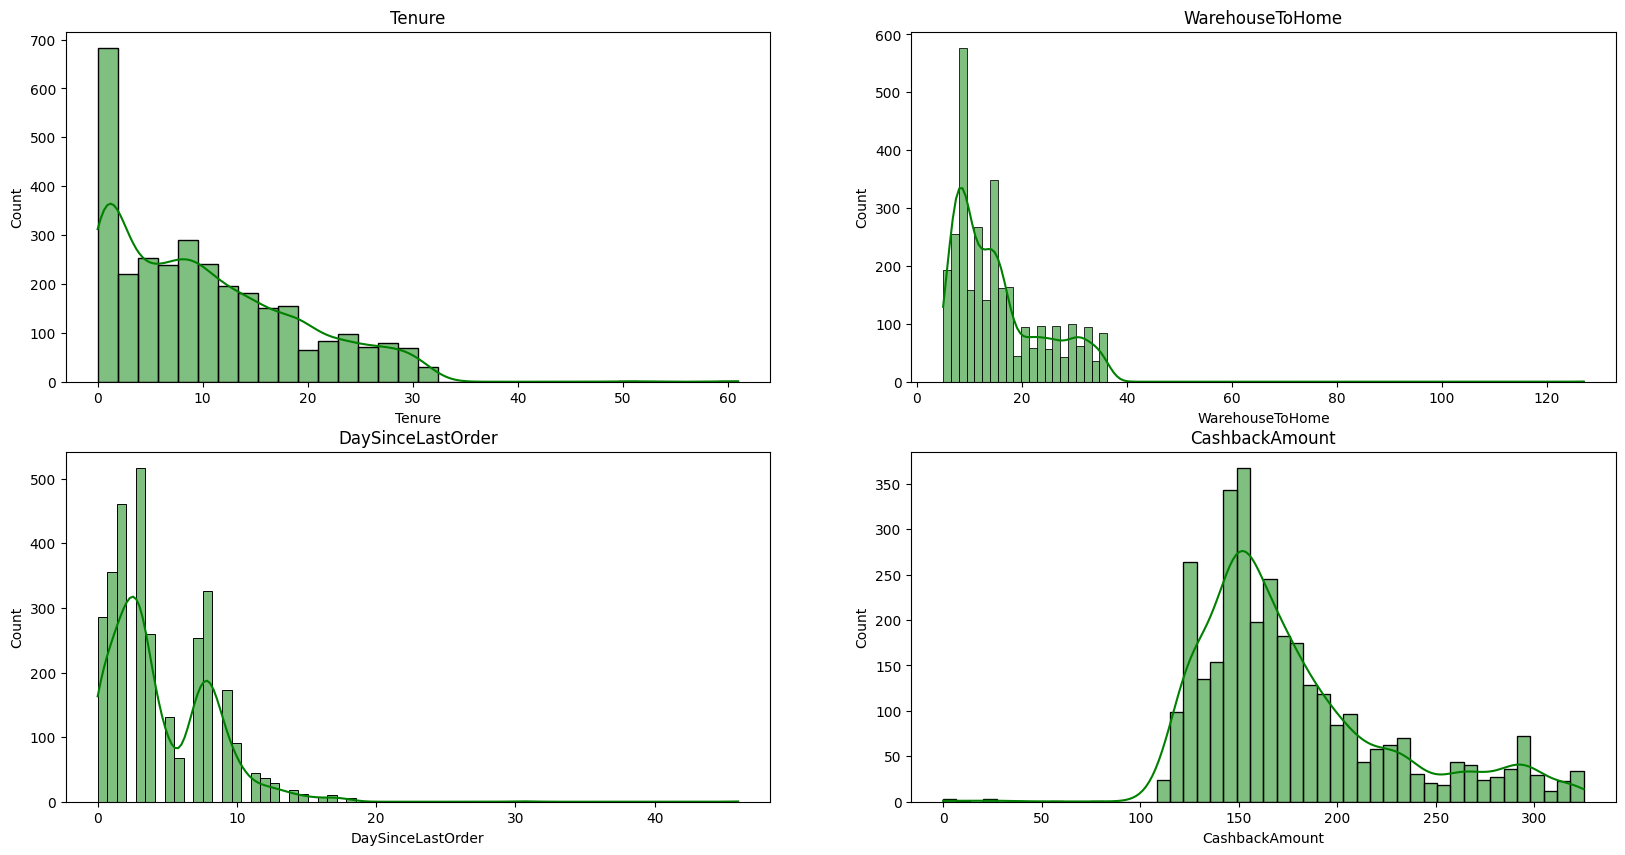

In [12]:
df_num = df[['Tenure','WarehouseToHome','DaySinceLastOrder','CashbackAmount']]
a = 1

plt.figure(figsize=(20,10))
for i in df_num.columns:
    plt.subplot(2,2,a)
    sns.histplot(df_num,x=i,kde=True,color='green')
    plt.title(i)
    a = a + 1

Keempat kolom diatas tidak terdistribusi normal apabila dilihat berdasarkan histogram. Oleh karena itu, apabila dari keempat kolom ini ada yang bernilai missing values, maka dapat diisi dengan median.

### **Melihat Outlier Data Numerikal Continous Dengan Boxplot**

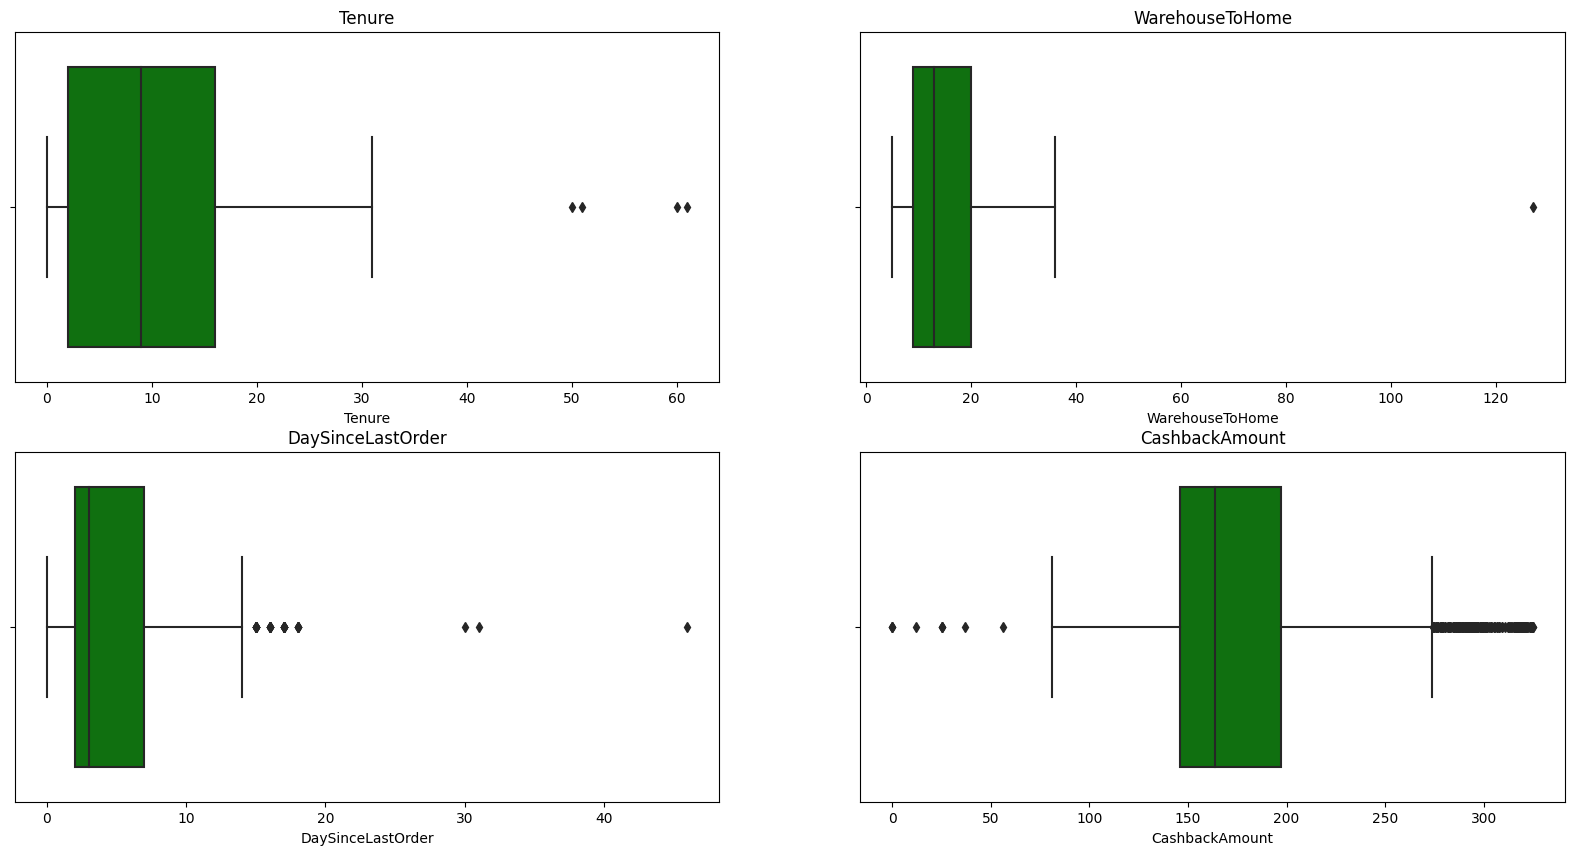

In [13]:
b = 1

plt.figure(figsize=(20,10))
for i in df_num.columns:
    plt.subplot(2,2,b)
    sns.boxplot(df_num,x=i,orient='h',color='green')
    plt.title(i)
    b = b + 1

Dari beberapa kolom diatas, dapat dilihat ada beberapa nilai outlier khususnya pada CashbackAmount, namun data data tersebut bukanlah sebuah kesalahan penginputan data atau sistem, namun memang realitasnya seperti itu. Maka dari itu, dalam membuat model classification kali ini, data outlier tetap dilibatkan dan nantinya akan dipreprocessing menggunakan scaling ataupun binning untuk optimasi model.

### **Perbandingan Jumlah Churn per Data Kategorikal dan Numerikal Discrete**

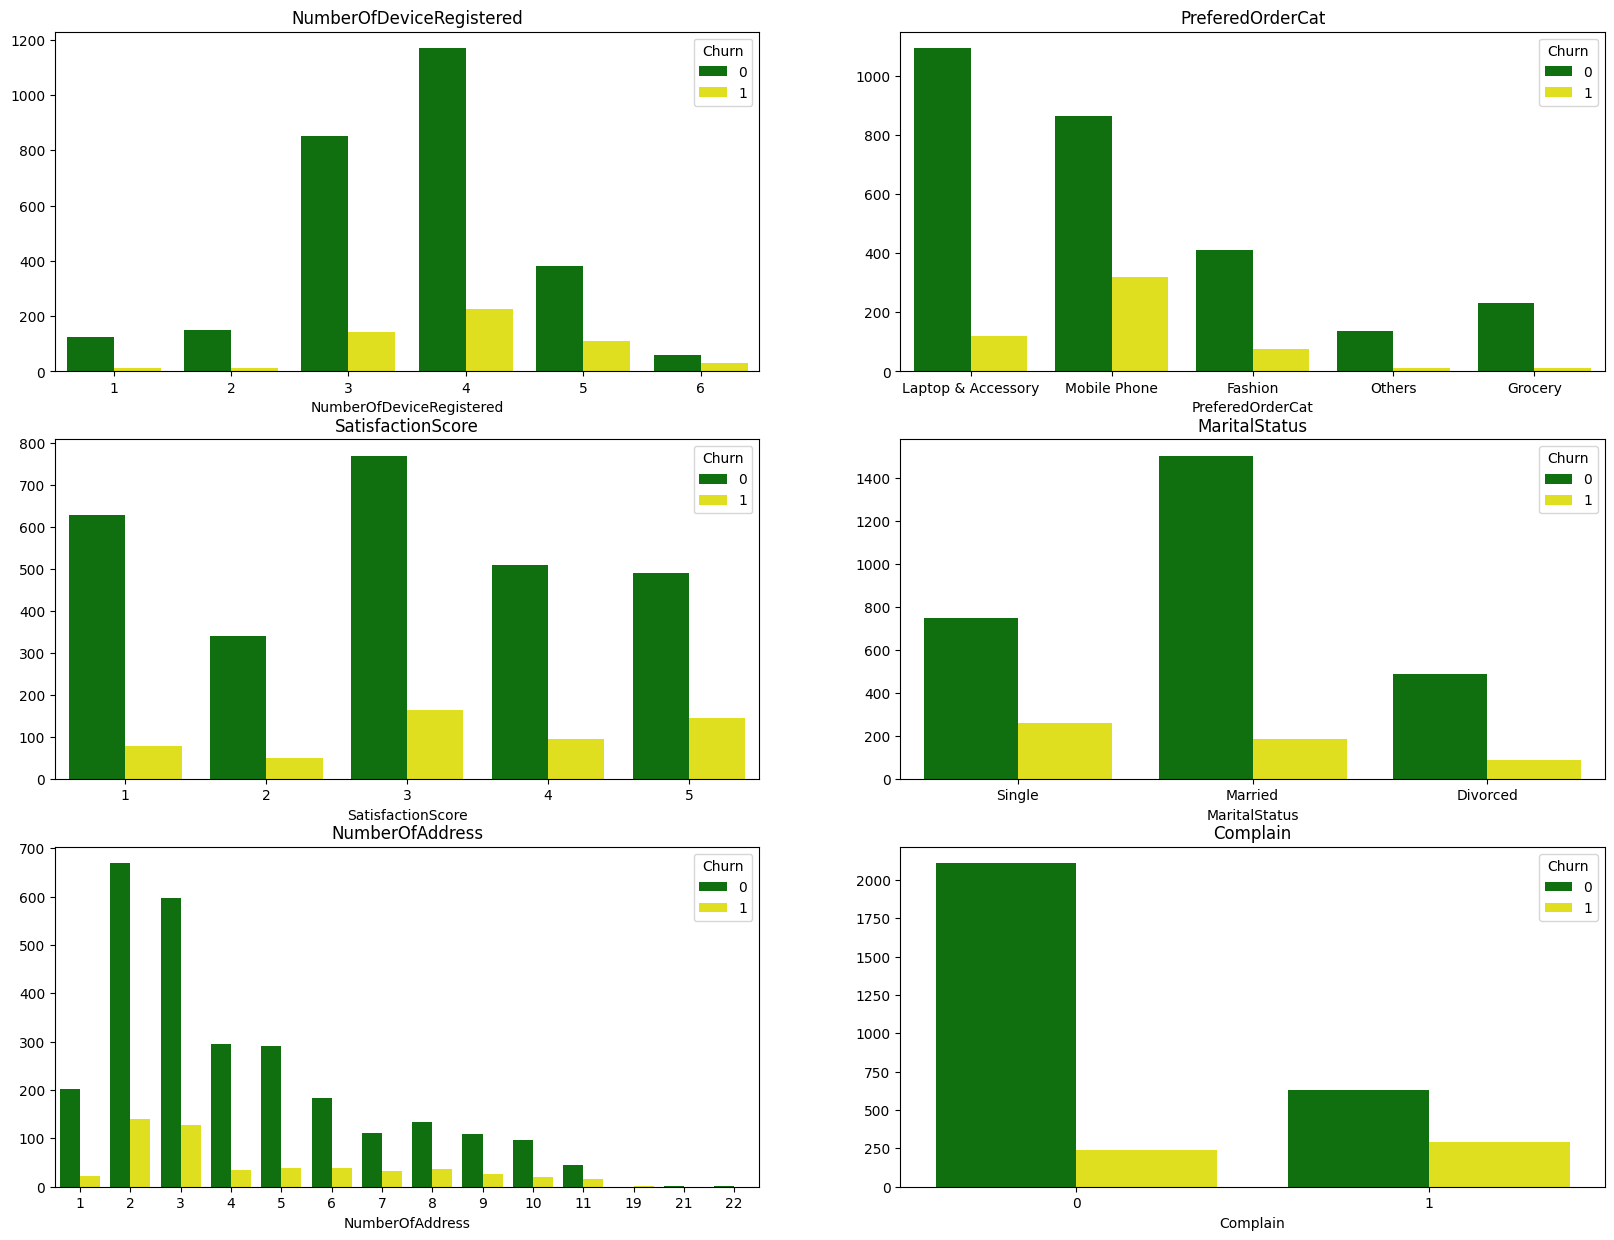

In [14]:
df_col = df[['NumberOfDeviceRegistered','PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus','NumberOfAddress', 'Complain','Churn']]

c = 1

plt.figure(figsize=(20,15))
for i in df_col.columns:
    if i != 'Churn' :
        plt.subplot(3,2,c)
        sns.barplot(df_col,x=i,y=df.index,estimator=len,hue='Churn',palette=['green', 'yellow'])
        plt.title(i)
        c = c + 1

Grafik diatas menunjukkan bahwa setiap feature berpengaruh terhadap nilai churn atau tidak

---
## **Define Feature and Target**

Karena setiap feature berpengaruh, maka untuk define X awal akan menggunakan semua featurenya

In [15]:
X = df.drop(columns='Churn')
y = df['Churn']

In [16]:
display(X , y)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17
...,...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90
3935,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80


0       0
1       0
2       0
3       0
4       0
       ..
3933    0
3935    0
3936    0
3937    0
3940    0
Name: Churn, Length: 3270, dtype: int64

---
## **Data Splitting**

Tujuan data splitting adalah untuk melihat performa dari model classification yang dibuat. Kalau tidak splitting dan semua data kita latih, maka mungkin saja hasilnya sangat bagus namun apabila diuji pada data lain akan jauh berbeda sehingga menyebabkan overfitting.

Pada kasus kali ini, akan dicoba membagi dari menjadi 80% train dan 20% test. Untuk model classification juga perlu ditambahkan parameter 'stratify' yang membuat proporsi target pada train dan test kurang lebih sama

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24,stratify=y)

In [18]:
print('Proporsi Train',y_train.value_counts() / y_train.value_counts().sum())

print('Proporsi Test',y_test.value_counts() / y_test.value_counts().sum())

Proporsi Train Churn
0    0.836774
1    0.163226
Name: count, dtype: float64
Proporsi Test Churn
0    0.836391
1    0.163609
Name: count, dtype: float64


Dengan hasil diatas, membuktikan dengan menambahkan parameter stratify akan menyamakan proporsi target pada train dan test

---
## **Data Preprocessing**

Preprocessing merupakan proses yang penting dalam sebuah perumusan model. Salah satu metode preprocessing adalah **Resampling** dimana **Resampling** adalah teknik yang digunakan untuk mengubah proporsi kelas dalam dataset, khususnya ketika memiliki data dengan jumlah sampel target yang tidak seimbang antara kelas positif dan negatif. Ada 2 jenis utama pada resampling yaitu **OverSampling** dan **UnderSampling**. Pada saat melakukan modeling, karena 
datanya tidak balance jadi akan dilakukan resampler dan akan diuji menggunakan keduanya untuk mencari metode resampling apa yang lebih tepat yang meningkatkan performa

Komponen yang cukup penting lainnya adalah **Feature Engineering** dimana **Feature Engineering** adalah proses membuat atau mengubah atau memanipulasi fitur-fitur yang akan digunakan sebagai modeling yang bertujuan untuk meningkatkan kualitas dari performa model nantinya. Beberapa cara dapat dilakukan pada Feature Engineering seperti memilih fitur, mengisi data kosong, encoding kategorikal, dan scaling data. Untuk preprocessing ini saya akan melakukan mengisi data kosong, encoding kategorikal, dan scaling data.

1. Mengisi Data Kosong / Hilang :
   - Pada dataset ini, ada 3 kolom yang memiliki data kosong yaitu **'Tenure', 'WarehouseToHome','DaySinceLastOrder'**
   - Ada beberapa metode untuk mengisi data hilang. Karena seperti hasil EDA yang dilakukan bahwa distribusi ketiga kolom diatas tidak normal. Maka pada case ini kita dapat menggunakan **Simple Imputer** dan mengisinya dengan **Median**.
2. Encoding Kategorikal (Kategorikal -> Numerikal)
   - Melakukan Encoding bertujuan agar machine learning pada akhirnya membutuhkan numerik dan tidak bisa belajar dari kategorikal berupa string.
   - Pada dataset ini, ada 2 kolom yang bertipe object atau kategorikal yaitu **'PreferedOrderCat', 'MaritalStatus'**
   - Ada beberapa metode untuk melakukan encoding. Karena kategorikal tersebut bukan merupakan ordinal dan juga jumlah unique datanya tidak banyak, kita dapat menggunakan **OneHotEncoder** sebagai metode encodingnya.
3. Scaling Data
   - Melakukan Scaling bertujuan agar fitur fitur yang sudah diubah berupa numerik maupun yang sudah dari awal berupa numerik memiliki skala yang sama antar fiturnya.
   - Ada beberapa metode untuk melakukan scaling. Karena ada beberapa fitur yang memiliki outliers, maka pada kasus ini dapat digunakan **RobustScaler** sebagai metode scalingnya.



### **Resampling**

### **Pipeline Transformer**

**Transformer** merupakan komponen yang digunakan dalam pengolahan data untuk mengelola secara terstruktur serangkaian transformasi data. Dan apabila ingin menggabungkan beberapa serangkaian, bisa menggunakan **Pipeline**

In [19]:
pipe_median_scaler = Pipeline([('median',SimpleImputer(strategy='median')),
                               ('scaler',RobustScaler())])

In [20]:
transformer = ColumnTransformer([
    ('pipe_median_scaler',pipe_median_scaler,['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']),
    ('onehot',OneHotEncoder(drop='first'),['PreferedOrderCat', 'MaritalStatus']),
    ],remainder='passthrough') 

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_median_scaler',
                                 Pipeline(steps=[('median',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

passthrough pada parameter remainder berfungsi agar kolom yang tidak dilakukan transformasi tetap ikut, dalam case ini fitur 'complain' karena data tersebut sudah lengkap, dan sudah bernilai 0 dan 1

---
## **Model & Evaluation**

### **Benchmark Model**

Pada benchmark model ini, akan dicoba beberapa model dengan parameter default agar dapat ditentukan model mana yang terbaik untuk dataset ini.

In [21]:
logreg = LogisticRegression(random_state=24)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=24)

voting = VotingClassifier([
    ('clf1',logreg),
    ('clf2',knn),
    ('clf3',tree)
])

stacking = StackingClassifier(
    estimators=[
    ('clf1',logreg),
    ('clf2',knn),
    ('clf3',tree)
    ],
    final_estimator=logreg
)

bagging = BaggingClassifier(random_state=24,estimator=knn)

forest = RandomForestClassifier(random_state=24)

adaboost = AdaBoostClassifier(random_state=24)

gradboost = GradientBoostingClassifier(random_state=24)

xgboost = XGBClassifier(random_state=24)

In [22]:
list_algo = [logreg,knn,tree,voting,stacking,bagging,forest,adaboost,gradboost,xgboost]
list_acc = []
list_mean = []
list_std = []

# evaluation matrics f2 score
f2_score = make_scorer(fbeta_score, beta=2)

for algo in list_algo:

    pipe_model = Pipeline([
    ('resampler',None), # tidak perlu ada resampling pada benchmark model
    ('prep', transformer),
    ('modeling', algo)
    ])

    model_cv = cross_val_score(estimator=pipe_model,
                    X = X_train,
                    y = y_train,
                    cv= 5,
                    scoring=f2_score,
                    error_score='raise')

    list_acc.append(model_cv.round(4))
    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())

In [23]:
df_cv = pd.DataFrame()
df_cv['algo'] = list_algo
df_cv['mean'] = list_mean
df_cv['std'] = list_std
df_cv['acc_all'] = list_acc

df_cv.sort_values('mean',ascending=False)

,algo,mean,std,acc_all
2,DecisionTreeClassifier(random_state=24),0.663959,0.035263,"[0.6909, 0.7175, 0.6322, 0.6542, 0.625]"
9,"XGBClassifier(base_score=None, booster=None, c...",0.659989,0.050717,"[0.677, 0.6917, 0.6522, 0.7126, 0.5665]"
8,GradientBoostingClassifier(random_state=24),0.619068,0.055571,"[0.6627, 0.6203, 0.6265, 0.6707, 0.5151]"
6,RandomForestClassifier(random_state=24),0.617494,0.035725,"[0.6448, 0.6049, 0.5875, 0.6724, 0.5779]"
7,AdaBoostClassifier(random_state=24),0.587608,0.047368,"[0.6158, 0.6053, 0.5911, 0.6295, 0.4963]"
4,"StackingClassifier(estimators=[('clf1', Logist...",0.586820,0.037768,"[0.6281, 0.5625, 0.6281, 0.5846, 0.5309]"
3,"VotingClassifier(estimators=[('clf1', Logistic...",0.509475,0.072437,"[0.5779, 0.4427, 0.6061, 0.4987, 0.422]"
0,LogisticRegression(random_state=24),0.470171,0.081651,"[0.5063, 0.3896, 0.5926, 0.4924, 0.3699]"
1,KNeighborsClassifier(),0.418071,0.067171,"[0.5164, 0.3324, 0.4744, 0.3806, 0.3866]"
5,BaggingClassifier(estimator=KNeighborsClassifi...,0.399705,0.053330,"[0.4663, 0.3226, 0.4534, 0.3816, 0.3747]"


Dari hasil benchmark model, didapat 2 model tertinggi yaitu DecisionTreeClassifier dan XGBClassifier. Kali ini, saya akan mencoba melakukan hyperparameter tuning terhadap 2 model tersebut sebelum menentukan model mana yang terbaik setelah hyperparameter tuning.

### **Hyperparameter Tuning**

#### **Resampling**

In [24]:
under = RandomUnderSampler(random_state=24)
over = RandomOverSampler(random_state=24)
smote = SMOTE(random_state=24)

#### **Decision Tree Classifier**

In [25]:
param_grid_tree = {
    'modeling__criterion': ['gini', 'entropy'],
    'modeling__max_depth': np.arange(1, 21), 
    'modeling__min_samples_split': np.arange(1, 100,3),  
    'modeling__min_samples_leaf': np.arange(1, 100,3),
    "modeling__class_weight" : [None,'balanced'],
    'resampler' : [under,over,smote]
}

# untuk estimator
pipe_model_tree = Pipeline([
        ('resampler',smote),
        ('prep', transformer),
        ('modeling', tree)
    ]) 

# define grid search
gridsearch_tree = GridSearchCV(
    estimator= pipe_model_tree,
    param_grid= param_grid_tree,
    cv= 5,
    scoring= f2_score,
    n_jobs= -1
)

gridsearch_tree.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
462000 fits failed out of a total of 1306800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "c:\Users\User\AppData\Local\Programs\Python\Python

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampler', SMOTE(random_state=24)),
                                       ('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_median_scaler',
                                                                         Pipeline(steps=[('median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'D...
                         'modeling__min_samples_leaf': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]),
                         'modeling__min_samples_split': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]),
                         'resampler': [RandomUnderSampler(random_state=24),
                                       RandomOverSampler(random_state=24),
                                       SMOTE(random_state=24)]},
             scoring=make_scorer(fbeta_score, beta=2))

In [26]:
gridsearch_tree.best_params_ 

{'modeling__class_weight': None,
 'modeling__criterion': 'entropy',
 'modeling__max_depth': 10,
 'modeling__min_samples_leaf': 25,
 'modeling__min_samples_split': 97,
 'resampler': RandomOverSampler(random_state=24)}

In [27]:
gridsearch_tree.best_score_ 

0.7118837367569713

In [28]:
pd.DataFrame(gridsearch_tree.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__class_weight,param_modeling__criterion,param_modeling__max_depth,param_modeling__min_samples_leaf,param_modeling__min_samples_split,param_resampler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
118501,0.053773,0.002300,0.012449,0.000808,None,entropy,17,25,97,RandomOverSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__cr...",0.755319,0.718623,0.689655,0.711297,0.684524,0.711884,0.0252,1
105433,0.061620,0.004414,0.016018,0.003283,None,entropy,13,25,97,RandomOverSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__cr...",0.755319,0.718623,0.689655,0.711297,0.684524,0.711884,0.0252,1
252448,0.054664,0.002638,0.013034,0.001686,balanced,entropy,18,25,97,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.755319,0.718623,0.689655,0.711297,0.684524,0.711884,0.0252,1
258982,0.056722,0.003149,0.011616,0.001281,balanced,entropy,20,25,97,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.755319,0.718623,0.689655,0.711297,0.684524,0.711884,0.0252,1
239380,0.060531,0.007630,0.012519,0.000711,balanced,entropy,14,25,97,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.755319,0.718623,0.689655,0.711297,0.684524,0.711884,0.0252,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128701,0.036313,0.002523,0.000000,0.000000,None,entropy,20,40,1,RandomOverSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__cr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,168961
128700,0.024270,0.000950,0.000000,0.000000,None,entropy,20,40,1,RandomUnderSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__cr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,168961
128699,0.005497,0.000632,0.000000,0.000000,None,entropy,20,37,97,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__cr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,168961
128735,0.005008,0.000556,0.000000,0.000000,None,entropy,20,40,34,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__cr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,168961


Karena hasilnya masih kurang bagus, maka saya akan melakukan hyperparameter tuning yang kedua

### **Decision Tree Classifier Second Tuning**

In [29]:
param_grid_tree_2 = {
    'modeling__criterion': ['gini', 'entropy'],
    'modeling__max_depth': np.arange(10, 31), 
    'modeling__min_samples_split': np.arange(50, 150,3),  
    'modeling__min_samples_leaf': np.arange(1, 50,2),
    "modeling__class_weight" : [None,'balanced'],
    'resampler' : [under,over,smote]
}

# untuk estimator
pipe_model_tree_2 = Pipeline([
        ('resampler',smote),
        ('prep', transformer),
        ('modeling', tree)
    ]) 

# define grid search
gridsearch_tree_2 = GridSearchCV(
    estimator= pipe_model_tree_2,
    param_grid= param_grid_tree_2,
    cv= 5,
    scoring= f2_score,
    n_jobs= -1
)

gridsearch_tree_2.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
357000 fits failed out of a total of 1071000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
71400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampler', SMOTE(random_state=24)),
                                       ('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_median_scaler',
                                                                         Pipeline(steps=[('median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'D...
                         'modeling__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'modeling__min_samples_split': array([ 50,  53,  56,  59,  62,  65,  68,  71,  74,  77,  80,  83,  86,
        89,  92,  95,  98, 101, 104, 107, 110, 113, 116, 119, 122, 125,
       128, 131, 134, 137, 140, 143, 146, 149]),
                         'resampler': [RandomUnderSampler(random_state=24),
                                       RandomOverSampler(random_state=24),
                                       SMOTE(random_state=24)]},
             scoring=make_scorer(fbeta_score, beta=2))

In [30]:
gridsearch_tree_2.best_params_ 

{'modeling__class_weight': None,
 'modeling__criterion': 'entropy',
 'modeling__max_depth': 10,
 'modeling__min_samples_leaf': 25,
 'modeling__min_samples_split': 98,
 'resampler': RandomOverSampler(random_state=24)}

In [31]:
gridsearch_tree_2.best_score_ 

0.7118837367569713

In [32]:
pd.DataFrame(gridsearch_tree_2.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__class_weight,param_modeling__criterion,param_modeling__max_depth,param_modeling__min_samples_leaf,param_modeling__min_samples_split,param_resampler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
187423,0.068641,0.006957,0.012722,0.000667,balanced,entropy,20,25,98,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.755319,0.718623,0.689655,0.711297,0.684524,0.711884,0.0252,1
54826,0.050887,0.000929,0.011735,0.000978,None,entropy,10,25,101,RandomOverSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__cr...",0.755319,0.718623,0.689655,0.711297,0.684524,0.711884,0.0252,1
164479,0.052247,0.000412,0.012218,0.000748,balanced,entropy,11,25,104,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.755319,0.718623,0.689655,0.711297,0.684524,0.711884,0.0252,1
161926,0.060672,0.008654,0.012346,0.000810,balanced,entropy,10,25,101,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.755319,0.718623,0.689655,0.711297,0.684524,0.711884,0.0252,1
179776,0.055127,0.001756,0.012222,0.001443,balanced,entropy,17,25,101,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.755319,0.718623,0.689655,0.711297,0.684524,0.711884,0.0252,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107081,0.005311,0.000505,0.000000,0.000000,None,entropy,30,49,131,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__cr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,142801
107078,0.005403,0.000491,0.000000,0.000000,None,entropy,30,49,128,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__cr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,142801
107075,0.005477,0.000555,0.000000,0.000000,None,entropy,30,49,125,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__cr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,142801
106991,0.006013,0.000445,0.000000,0.000000,None,entropy,30,47,143,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__cr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,142801


Hasil pada second tuning sama saja dengan first tuning, maka dari itu nilai terbaik yang bisa didapatkan pada tuning pada parameter yang saya tentukan hanya **0.71**

#### **XGBoost Classifier**

In [33]:
param_grid_xgb = {
    "modeling__n_estimators" : [50,100, 150],
    "modeling__max_depth" : [4,5,6,7],
    "modeling__eta" : [0.1,0.2,0.3],
    "modeling__gamma" : [0.01,0.1, 1],
    "modeling__colsample_bytree" : [0.6, 0.8, 1],
    "modeling__subsample" :  [0.6, 0.8, 1],
    "modeling__reg_alpha" : [0.01,0.1, 1], 
    "modeling__reg_lambda" : [0.01,0.1, 1],
    "modeling__class_weight" : [None,'balanced'],
    'resampler' : [under,over,smote]     
}

# untuk estimator
pipe_model_xgb = Pipeline([
        ('resampler',smote),
        ('prep', transformer),
        ('modeling', xgboost)
    ]) 

# define grid search
gridsearch_xgb = GridSearchCV(
    estimator= pipe_model_xgb,
    param_grid= param_grid_xgb,
    cv= 5,
    scoring= f2_score,
    n_jobs= -1
)

gridsearch_xgb.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
87480 fits failed out of a total of 262440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17496 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\Ap

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampler', SMOTE(random_state=24)),
                                       ('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_median_scaler',
                                                                         Pipeline(steps=[('median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'D...
                         'modeling__gamma': [0.01, 0.1, 1],
                         'modeling__max_depth': [4, 5, 6, 7],
                         'modeling__n_estimators': [50, 100, 150],
                         'modeling__reg_alpha': [0.01, 0.1, 1],
                         'modeling__reg_lambda': [0.01, 0.1, 1],
                         'modeling__subsample': [0.6, 0.8, 1],
                         'resampler': [RandomUnderSampler(random_state=24),
                                       RandomOverSampler(random_state=24),
                                       SMOTE(random_state=24)]},
             scoring=make_scorer(fbeta_score, beta=2))

In [34]:
gridsearch_xgb.best_params_

{'modeling__class_weight': None,
 'modeling__colsample_bytree': 0.8,
 'modeling__eta': 0.2,
 'modeling__gamma': 0.01,
 'modeling__max_depth': 6,
 'modeling__n_estimators': 150,
 'modeling__reg_alpha': 0.01,
 'modeling__reg_lambda': 0.01,
 'modeling__subsample': 0.6,
 'resampler': RandomUnderSampler(random_state=24)}

In [35]:
gridsearch_xgb.best_score_

0.7626650985355721

In [36]:
pd.DataFrame(gridsearch_xgb.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__class_weight,param_modeling__colsample_bytree,param_modeling__eta,param_modeling__gamma,param_modeling__max_depth,param_modeling__n_estimators,...,param_resampler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12312,0.198042,0.012063,0.015522,0.001045,None,0.8,0.2,0.01,6,150,...,RandomUnderSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",0.781893,0.797980,0.743381,0.786290,0.703782,0.762665,0.034682,1
38556,0.225039,0.022357,0.015424,0.000375,balanced,0.8,0.2,0.01,6,150,...,RandomUnderSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.781893,0.797980,0.743381,0.786290,0.703782,0.762665,0.034682,1
35584,0.533518,0.025395,0.015843,0.001517,balanced,0.8,0.1,0.01,6,100,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.782313,0.810502,0.735981,0.814732,0.664336,0.761573,0.056143,3
9340,0.524672,0.037181,0.014716,0.000751,None,0.8,0.1,0.01,6,100,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",0.782313,0.810502,0.735981,0.814732,0.664336,0.761573,0.056143,3
22603,0.276844,0.010656,0.013821,0.001253,None,1,0.2,1,5,50,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",0.775281,0.820225,0.723982,0.816555,0.668203,0.760849,0.057930,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26228,0.004705,0.000749,0.000000,0.000000,None,1,0.3,1,7,150,...,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34993
26225,0.005677,0.000412,0.000000,0.000000,None,1,0.3,1,7,150,...,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34993
26222,0.005200,0.000401,0.000000,0.000000,None,1,0.3,1,7,150,...,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34993
26255,0.005129,0.000747,0.000000,0.000000,balanced,0.6,0.1,0.01,4,50,...,SMOTE(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34993


Hasil pada first tuning sebenarnya sudah meningkat, namun karena parameter pada XGBoost sangat banyak dan rangenya pun cukup besar. Maka saya akan coba mempersempit range pada second tuning

#### **XGB Classifier Second Tuning**

In [37]:
param_grid_xgb_2 = {
    "modeling__n_estimators" : [75,100,125],
    "modeling__max_depth" : [3,5,6],
    "modeling__eta" : [0.05,0.1,0.2],
    "modeling__gamma" : [0.01,0.1, 1],
    "modeling__colsample_bytree" : [0.7, 0.8, 0.9],
    "modeling__subsample" : [0.7, 0.8, 0.9],
    "modeling__reg_alpha" : [0.01,0.1, 1], 
    "modeling__reg_lambda" : [0.01,0.1, 1],
    "modeling__class_weight" : [None,'balanced'],
    'resampler' : [under,over,smote]     
}

# untuk estimator
pipe_model_xgb_2 = Pipeline([
        ('resampler',smote),
        ('prep', transformer),
        ('modeling', xgboost)
    ]) 

# define grid search
gridsearch_xgb_2 = GridSearchCV(
    estimator= pipe_model_xgb_2,
    param_grid= param_grid_xgb_2,
    cv= 5,
    scoring= f2_score,
    n_jobs= -1
)

gridsearch_xgb_2.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
65610 fits failed out of a total of 196830.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13122 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\Ap

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampler', SMOTE(random_state=24)),
                                       ('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_median_scaler',
                                                                         Pipeline(steps=[('median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'D...
                         'modeling__gamma': [0.01, 0.1, 1],
                         'modeling__max_depth': [3, 5, 6],
                         'modeling__n_estimators': [75, 100, 125],
                         'modeling__reg_alpha': [0.01, 0.1, 1],
                         'modeling__reg_lambda': [0.01, 0.1, 1],
                         'modeling__subsample': [0.7, 0.8, 0.9],
                         'resampler': [RandomUnderSampler(random_state=24),
                                       RandomOverSampler(random_state=24),
                                       SMOTE(random_state=24)]},
             scoring=make_scorer(fbeta_score, beta=2))

In [38]:
gridsearch_xgb_2.best_params_

{'modeling__class_weight': None,
 'modeling__colsample_bytree': 0.7,
 'modeling__eta': 0.1,
 'modeling__gamma': 1,
 'modeling__max_depth': 6,
 'modeling__n_estimators': 100,
 'modeling__reg_alpha': 0.01,
 'modeling__reg_lambda': 0.1,
 'modeling__subsample': 0.9,
 'resampler': RandomOverSampler(random_state=24)}

In [39]:
gridsearch_xgb_2.best_score_

0.7643190355229572

In [40]:
pd.DataFrame(gridsearch_xgb_2.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__class_weight,param_modeling__colsample_bytree,param_modeling__eta,param_modeling__gamma,param_modeling__max_depth,param_modeling__n_estimators,...,param_resampler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4228,0.463482,0.018840,0.015520,0.002816,None,0.7,0.1,1,6,100,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",0.793103,0.829545,0.730858,0.810811,0.657277,0.764319,0.062964,1
23911,0.551868,0.027058,0.014024,0.000448,balanced,0.7,0.1,1,6,100,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.793103,0.829545,0.730858,0.810811,0.657277,0.764319,0.062964,1
2683,0.382403,0.008284,0.014418,0.001565,None,0.7,0.1,0.01,6,75,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",0.776256,0.797267,0.754060,0.814978,0.678161,0.764144,0.047587,3
22366,0.409344,0.021238,0.013632,0.001047,balanced,0.7,0.1,0.01,6,75,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.776256,0.797267,0.754060,0.814978,0.678161,0.764144,0.047587,3
9157,0.544887,0.018523,0.013517,0.000547,None,0.8,0.1,0.01,5,125,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",0.764840,0.806818,0.766590,0.810811,0.658199,0.761452,0.055124,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19673,0.004777,0.000626,0.000000,0.000000,None,0.9,0.2,1,6,125,...,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26245
19670,0.004903,0.000661,0.000000,0.000000,None,0.9,0.2,1,6,125,...,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26245
19667,0.004510,0.000556,0.000000,0.000000,None,0.9,0.2,1,6,125,...,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26245
19691,0.007012,0.004020,0.000000,0.000000,balanced,0.7,0.05,0.01,3,75,...,SMOTE(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26245


Hasil pada second tuning meningkat namun tidak signifikan. Saya akan mencoba tuning sekali lagi dan makin mempersempit range berdasarkan hasil terbaik pada tuning sebelumnya.

#### **XGB Classifier Third Tuning**

In [41]:
param_grid_xgb_3 = {
    "modeling__n_estimators" : [65,75,85],
    "modeling__max_depth" : [1,2,5,6],
    "modeling__eta" : [0.05,0.1,0.15],
    "modeling__gamma" : [0.01,0.1, 1],
    "modeling__colsample_bytree" : [0.7, 0.8, 0.9],
    "modeling__subsample" : [0.7, 0.8, 0.9],
    "modeling__reg_alpha" : [0.01,0.1, 1], 
    "modeling__reg_lambda" : [0.01,0.1, 1],
    "modeling__class_weight" : [None,'balanced'],
    'resampler' : [under,over,smote]   
}

# untuk estimator
pipe_model_xgb_3 = Pipeline([
        ('resampler',smote),
        ('prep', transformer),
        ('modeling', xgboost)
    ]) 

# define grid search
gridsearch_xgb_3 = GridSearchCV(
    estimator= pipe_model_xgb_3,
    param_grid= param_grid_xgb_3,
    cv= 5,
    scoring= f2_score,
    n_jobs= -1
)

gridsearch_xgb_3.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
87480 fits failed out of a total of 262440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17496 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\Ap

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampler', SMOTE(random_state=24)),
                                       ('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_median_scaler',
                                                                         Pipeline(steps=[('median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'D...
                         'modeling__gamma': [0.01, 0.1, 1],
                         'modeling__max_depth': [1, 2, 5, 6],
                         'modeling__n_estimators': [65, 75, 85],
                         'modeling__reg_alpha': [0.01, 0.1, 1],
                         'modeling__reg_lambda': [0.01, 0.1, 1],
                         'modeling__subsample': [0.7, 0.8, 0.9],
                         'resampler': [RandomUnderSampler(random_state=24),
                                       RandomOverSampler(random_state=24),
                                       SMOTE(random_state=24)]},
             scoring=make_scorer(fbeta_score, beta=2))

In [42]:
gridsearch_xgb_3.best_params_

{'modeling__class_weight': None,
 'modeling__colsample_bytree': 0.7,
 'modeling__eta': 0.15,
 'modeling__gamma': 0.01,
 'modeling__max_depth': 5,
 'modeling__n_estimators': 85,
 'modeling__reg_alpha': 0.1,
 'modeling__reg_lambda': 1,
 'modeling__subsample': 0.9,
 'resampler': RandomOverSampler(random_state=24)}

In [43]:
gridsearch_xgb_3.best_score_

0.764820011078368

In [44]:
pd.DataFrame(gridsearch_xgb_3.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__class_weight,param_modeling__colsample_bytree,param_modeling__eta,param_modeling__gamma,param_modeling__max_depth,param_modeling__n_estimators,...,param_resampler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6532,0.331926,0.020710,0.013217,0.000606,None,0.7,0.15,0.01,5,85,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",0.793651,0.818182,0.760369,0.790646,0.661253,0.764820,0.054939,1
32776,0.364179,0.031884,0.018363,0.005397,balanced,0.7,0.15,0.01,5,85,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.793651,0.818182,0.760369,0.790646,0.661253,0.764820,0.054939,1
29980,0.430410,0.036427,0.015837,0.001554,balanced,0.7,0.1,0.01,6,75,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.776256,0.797267,0.754060,0.814978,0.678161,0.764144,0.047587,3
3736,0.378793,0.014113,0.015217,0.002105,None,0.7,0.1,0.01,6,75,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",0.776256,0.797267,0.754060,0.814978,0.678161,0.764144,0.047587,3
33736,0.392947,0.033556,0.014419,0.001286,balanced,0.7,0.15,0.1,5,85,...,RandomOverSampler(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",0.751708,0.835240,0.758621,0.809313,0.665138,0.764004,0.058450,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26228,0.004703,0.000398,0.000000,0.000000,None,0.9,0.15,1,6,85,...,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34993
26225,0.006005,0.001377,0.000000,0.000000,None,0.9,0.15,1,6,85,...,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34993
26222,0.005905,0.000920,0.000000,0.000000,None,0.9,0.15,1,6,85,...,SMOTE(random_state=24),"{'modeling__class_weight': None, 'modeling__co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34993
26255,0.006347,0.001377,0.000000,0.000000,balanced,0.7,0.05,0.01,1,65,...,SMOTE(random_state=24),"{'modeling__class_weight': 'balanced', 'modeli...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34993


Pada third tuning, kenaikan juga terjadi tapi hanya sedikit sekali. Oleh karena itu apabila dilakukan tuning kembali mungkin hanya akan naik sedikit saja dari **0.76**. Namun karena seperti yang sudah disinggung diawal bahwa parameter pada XGBoost sangat banyak dan rangenya juga sangat luas. Saya akan coba melakukan **randomized search** dengan range parameter yang lebih luas dan banyak

#### **XGBoost Classifier Randomized Tuning**

In [50]:
param_grid_xgb_4 = {
    "modeling__n_estimators" : range(50,121,5),
    "modeling__max_depth" : range(1,11),
    "modeling__eta" : list(np.arange(0.1, 0.5, 0.05)),
    "modeling__gamma" : [0.001,0.01,0.1, 1,10,100],
    "modeling__colsample_bytree" : list(np.arange(0.1, 0.5, 0.05)),
    "modeling__subsample" : list(np.arange(0.1, 0.5, 0.05)),
    "modeling__reg_alpha" : [0.001,0.01,0.1, 1,10,100], 
    "modeling__reg_lambda" : [0.001,0.01,0.1, 1,10,100],
    "modeling__class_weight" : [None,'balanced'],
    'resampler' : [None,under,over,smote]   
}

# untuk estimator
pipe_model_xgb_4 = Pipeline([
        ('resampler',None),
        ('prep', transformer),
        ('modeling', xgboost)
    ]) 

# define grid search
randomsearch_xgb_4 = RandomizedSearchCV(
    estimator= pipe_model_xgb_4,
    param_distributions= param_grid_xgb_4,
    cv= 5,
    scoring= f2_score,
    n_iter=10000,
    n_jobs= -1
)

randomsearch_xgb_4.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
13070 fits failed out of a total of 50000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2614 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppD

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampler', None),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_median_scaler',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'DaySinceLastO...
                                        'modeling__reg_lambda': [0.001, 0.01,
                                                                 0.1, 1, 10,
                                                                 100],
                                        'modeling__subsample': [0.1,
                                                                0.15000000000000002,
                                                                0.20000000000000004,
                                                                0.25000000000000006,
                                                                0.30000000000000004,
                                                                0.3500000000000001,
                                                                0.40000000000000013,
                                                                0.45000000000000007],
                                        'resampler': [None,
                                                      RandomUnderSampler(random_state=24),
                                                      RandomOverSampler(random_state=24),
                                                      SMOTE(random_state=24)]},
                   scoring=make_scorer(fbeta_score, beta=2))

In [51]:
randomsearch_xgb_4.best_params_

{'resampler': RandomOverSampler(random_state=24),
 'modeling__subsample': 0.40000000000000013,
 'modeling__reg_lambda': 0.001,
 'modeling__reg_alpha': 1,
 'modeling__n_estimators': 105,
 'modeling__max_depth': 9,
 'modeling__gamma': 1,
 'modeling__eta': 0.40000000000000013,
 'modeling__colsample_bytree': 0.40000000000000013,
 'modeling__class_weight': None}

In [52]:
randomsearch_xgb_4.best_score_

0.7403583855716689

In [53]:
pd.DataFrame(randomsearch_xgb_4.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_modeling__subsample,param_modeling__reg_lambda,param_modeling__reg_alpha,param_modeling__n_estimators,param_modeling__max_depth,...,param_modeling__class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6969,0.563731,0.024455,0.015803,0.001057,RandomOverSampler(random_state=24),0.4,0.001,1,105,9,...,None,{'resampler': RandomOverSampler(random_state=2...,0.733634,0.786517,0.764840,0.782998,0.633803,0.740358,0.056475,1
5025,0.249881,0.016846,0.017971,0.005410,RandomOverSampler(random_state=24),0.4,1,0.1,50,6,...,None,{'resampler': RandomOverSampler(random_state=2...,0.707865,0.809313,0.727273,0.790646,0.666667,0.740353,0.052803,2
1169,0.428834,0.033535,0.014915,0.000800,RandomOverSampler(random_state=24),0.45,0.001,1,90,10,...,None,{'resampler': RandomOverSampler(random_state=2...,0.757919,0.799550,0.712670,0.776805,0.648148,0.739018,0.053667,3
6701,0.285652,0.026772,0.016125,0.003161,RandomOverSampler(random_state=24),0.45,1,1,75,5,...,None,{'resampler': RandomOverSampler(random_state=2...,0.741573,0.782998,0.728700,0.783664,0.656109,0.738609,0.046720,4
2593,0.313727,0.009133,0.026038,0.013480,RandomOverSampler(random_state=24),0.35,1,1,50,8,...,None,{'resampler': RandomOverSampler(random_state=2...,0.737885,0.802198,0.733333,0.771739,0.647321,0.738495,0.051967,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456,0.005382,0.000552,0.000000,0.000000,SMOTE(random_state=24),0.1,0.01,0.1,95,10,...,balanced,"{'resampler': SMOTE(random_state=24), 'modelin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7387
153,0.008217,0.001827,0.000000,0.000000,SMOTE(random_state=24),0.25,0.1,0.001,95,10,...,None,"{'resampler': SMOTE(random_state=24), 'modelin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7387
5465,0.005536,0.000756,0.000000,0.000000,SMOTE(random_state=24),0.2,1,0.01,50,6,...,None,"{'resampler': SMOTE(random_state=24), 'modelin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7387
5559,0.006703,0.001328,0.000000,0.000000,SMOTE(random_state=24),0.45,10,10,55,2,...,None,"{'resampler': SMOTE(random_state=24), 'modelin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7387


Hasil randomized pada 10000 iterasi ternyata memiliki f2 score lebih kecil dibandingkan hasil gridsearch tuning. Jadi tidak perlu digunakan untuk perbandingan

### **Best Model**

Mari kita simpulkan hasil tuning dalam sebuah tabel agar lebih mudah dilihat dan untuk menentukan model mana yang terbaik untuk digunakan

In [64]:
df_result = pd.DataFrame()
df_result['Decision Tree Classifier'] = {0:df_cv['mean'][2],1:gridsearch_tree.best_score_,2:gridsearch_tree_2.best_score_,3:np.NaN}
df_result['XGBoost Classifier'] = {0:df_cv['mean'][9],1:gridsearch_xgb.best_score_,2:gridsearch_xgb_2.best_score_,3:gridsearch_xgb_3.best_score_}
df_result

,Decision Tree Classifier,XGBoost Classifier
0,0.663959,0.659989
1,0.711884,0.762665
2,0.711884,0.764319
3,NaN,0.764820


Dari hasil tabel diatas, dapat dilihat XGBoost Third Tuning adalah hasil yang terbaik dan kita dapat menggunakannya sebagai model prediksinya.

Parameternya adalah sebagai berikut :
| **Parameter** | **Description** |
| --- | --- |
| resampling: RandomOverSampler(random_state=24) | menduplikasi acak beberapa sampel dari kelas minoritas dalam dataset |
| class_weight: None () | karena sudah dilakukan resampling, maka class weight tidak perlu diset 'balanced' |
| colsample_bytree: 0.7 | hanya 70% dari fitur (kolom) yang akan digunakan secara acak untuk mengurangi potensi overfitting |
| eta: 0.15 | Nilai 0.15 menunjukkan bahwa model akan memperbarui estimasinya dengan hati-hati pada setiap iterasi, dengan sekitar 15% dari perubahan dari iterasi sebelumnya. |
| gamma: 0.01 | 0.01 adalah ambang batas yang mengontrol besarnya penurunan gain minimum yang harus dicapai saat membagi simpul dalam pohon keputusan, yang membantu mencegah overfitting |
| max_depth: 5 | 5 adalah batasan kedalaman maksimum dari pohon keputusan yang digunakan dalam model |
| n_estimators: 85 | 85 adalah jumlah total pohon keputusan yang akan dibangun dalam model |
| reg_alpha: 0.1 | 0.1 adalah parameter regularisasi yang mengontrol besarnya penalitas yang diterapkan pada berat (weight) dari decision tree |
| reg_lambda: 1 | 1 adalah parameter regularisasi yang mengontrol besarnya penalitas yang diterapkan pada kompleksitas model dengan mengurangkan magnitudo dari bobot (weight) dari daun pohon keputusan |
| subsample: 0.9 | 0.9 adalah proporsi dari sampel yang digunakan secara acak untuk melatih setiap pohon dalam ensemble |

### **Performance in Test Set**

XGBoost (Extreme Gradient Boosting) Classifier adalah algoritma ensemble machine learning yang bekerja dengan cara menggabungkan banyak pohon keputusan (decision trees) ke dalam sebuah model yang kuat. Prosesnya dimulai dengan pembuatan pohon keputusan sederhana yang disebut pohon stumpt. Pohon ini terus ditingkatkan dengan menambahkan pohon-pohon lainnya secara berurutan. Pada setiap iterasi, model mencoba memprediksi label dengan mempertimbangkan prediksi yang telah dibuat sebelumnya dan fokus pada sampel yang masih salah klasifikasinya. Dengan demikian, setiap pohon berusaha memperbaiki kesalahan yang dibuat oleh pohon sebelumnya. Hyperparameter yang dapat dilakukan ada banyak dan sudah disinggung pada penjelasan parameter pada best model

#### **Predict Test Set Before Hyperparameter Tuning**

In [66]:
pipe_model_before = Pipeline([
    ('resampler',None), # tidak perlu ada resampling pada benchmark model
    ('prep', transformer),
    ('modeling', xgboost)
    ])

# fitting
pipe_model_before.fit(X_train, y_train)

# predict
y_pred_before = pipe_model_before.predict(X_test)

# f2 score score
f2score_before = fbeta_score(y_test, y_pred_before, beta=2)
f2score_before

0.6949806949806949

#### **Predict Test Set After Hyperparameter Tuning**

In [67]:
model_after = gridsearch_xgb_3.best_estimator_

# fitting
model_after.fit(X_train, y_train)

# predict
y_pred_after = model_after.predict(X_test)

# f2 score score
f2score_after = fbeta_score(y_test, y_pred_after, beta=2)
f2score_after

0.7851985559566788

#### **Predict Test Set After Hyperparameter Tuning with Optimized Threshold**

Dalam klasifikasi, threshold defaultnya adalah 0.5. Untuk meningkatkan performanya, sebenarnya kita bisa mengoptimasi threshold agar scoring yang didapatkan lebih maksimal.

In [95]:
list_threshold = np.arange(0.01, 1.00, 0.01)
list_f2 = []

for threshold in list_threshold:

    # predict
    y_pred_proba = model_after.predict_proba(X_test)[:, 1]       # hasil prediksi dalam bentuk probability
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     # yg probability-nya di atas threshold masuk ke kelas 1

    # f1 score
    list_f2.append(fbeta_score(y_test, y_pred_class, beta=2))

df_th = pd.DataFrame()
df_th['threshold'] = list_threshold
df_th['f2'] = list_f2

df_th.sort_values('f2',ascending=False).head(20)

,threshold,f2
19,0.20,0.812808
23,0.24,0.812604
22,0.23,0.811258
18,0.19,0.810147
21,0.22,0.809917
28,0.29,0.807823
20,0.21,0.807249
17,0.18,0.806189
36,0.37,0.805604
25,0.26,0.805369


Threshold terbaik adalah 0.2 dengan nilai F2 Score 0.81

In [100]:
# train
y_pred_thres_train = model_after.predict_proba(X_train)[:, 1] 
y_pred_thres_train = np.where(y_pred_thres_train>0.20,1,0)

f2score_train_after_threshold = fbeta_score(y_train, y_pred_thres_train, beta=2)
f2score_train_after_threshold

0.8627689809175801

In [99]:
y_pred_thres = model_after.predict_proba(X_test)[:, 1] 
y_pred_thres = np.where(y_pred_thres>0.20,1,0)

f2score_after_threshold = fbeta_score(y_test, y_pred_thres, beta=2)
f2score_after_threshold

0.812807881773399

In [93]:
print(f2score_before, 'XGboost Before Tuning')
print(f2score_after, 'XGboost After Tuning')
print(f2score_after_threshold, 'XGboost After Tuning and Optimized Threshold')

0.6949806949806949 XGboost Before Tuning
0.7851985559566788 XGboost After Tuning
0.812807881773399 XGboost After Tuning and Optimized Threshold


Mari kita lihat apakah terjadi overfitting di model setelah tuning

In [94]:
df_tuning = pd.DataFrame({
    'Before Tuning' : [df_cv['mean'][9],f2score_before],
    'After Tuning':[gridsearch_xgb_3.best_score_,f2score_after],
    'After Tuning and Optimzed Threshold':[f2score_train_after_threshold,f2score_after_threshold]
},index=['Train Data','Test Data'])
df_tuning

,Before Tuning,After Tuning,After Tuning and Optimzed Threshold
Train Data,0.659989,0.764820,0.862769
Test Data,0.694981,0.785199,0.812808


Dapat dilihat, sebelum tuning memang sedikit overfitting. Namun setelah dilakukan tunning, model predict ke train dan test hasil f2 scorenya tidak terlalu jauh atau tidak mengalami overfitting. Hasilnya juga sudah cukup meningkat jauh dari before tunning sehingga tidak terjadi underfitting. Walaupun memang setelah dilakukan optimized threshold, hasilnya meningkat. Tapi jika dibandingkan dengan scoring train data, model cenderung mengalami overfitting.

#### **Confusion Matrix**

Kita juga bisa melihat berdasarkan confusion matrixnya untuk melihat jumlahnya lebih detail sebelum dan setelah tuning (sebelum dan sesudah optimized threshold)

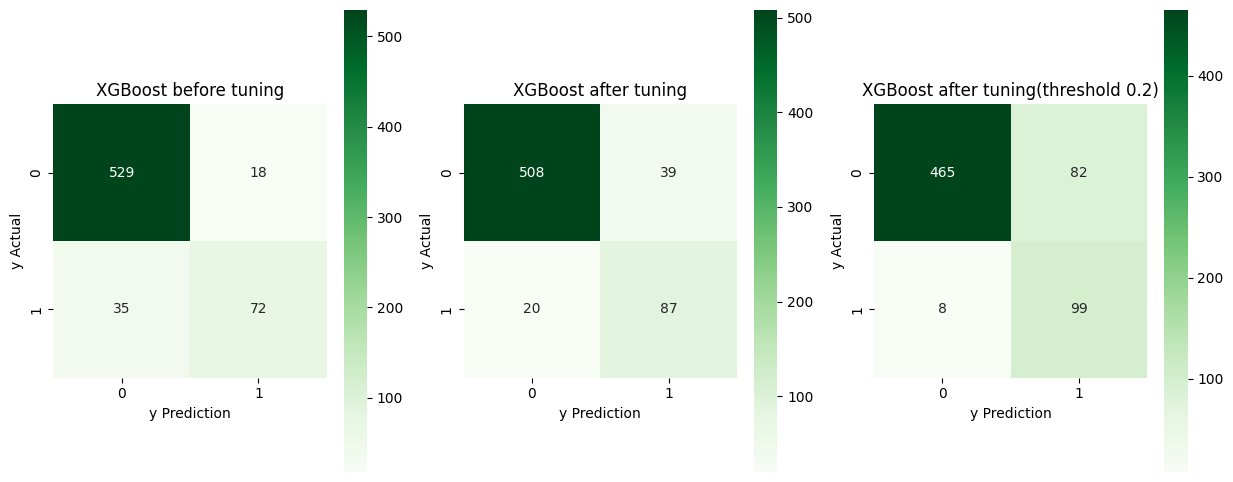

In [102]:
plt.figure(figsize=(15,6))

# Model XGBoost before tuning
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f', square=True,cmap="Greens")
plt.xlabel('y Prediction')
plt.ylabel('y Actual')
plt.title('XGBoost before tuning')

# Model XGBoost after tuning
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f', square=True,cmap="Greens")
plt.xlabel('y Prediction')
plt.ylabel('y Actual')
plt.title('XGBoost after tuning');

# Model XGBoost after tuning
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test, y_pred_thres), annot=True, fmt='.0f', square=True,cmap="Greens")
plt.xlabel('y Prediction')
plt.ylabel('y Actual')
plt.title('XGBoost after tuning(threshold 0.2)');

Model yang dipakai tetap model dengan threshold default. Model ini juga perlu dicek beberapa nilai dalam bentuk persen keakuratan dalam memprediksi customer churn atau tidak

True Prediction = (TP + TN) / Total = 595 / 654 = 90.97%

True Positive Rate(Recall) = TP / (TP + FN) = 87 / 107 = 81.3%
Precision = TP / (TP + FP) = 87 / 126 = 69.04%
False Positive Rate = FP / (FP + TN) = 39 / 547 = 7.12%
False Negative Rate = 1 - Recall = 18.7%


